Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Mais informações: https://ciia-saude.medicina.ufmg.br/

# **Estatística Inferencial - Testes de média**
Variáveis Numéricas (distribuições normais) x Categóricas

In [1]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

import scipy.stats as stats
import statsmodels.stats.multicomp as stsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import AnovaRM

In [ ]:
# caso a biblioteca scipy não esteja no servidor da Google
# instalar ela com o comando !pip (somente se der algum erro no bloco de cima)

# !pip install scipy

# Abrir o arquivo

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

# Ler o arquivo
dados = pd.read_excel(arquivo)
dados

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,...,IG_TERMO,HOUVE_CESAREA,HOUVE_LACERACAO,HOUVE_CM,PARIDADE,PESO_VIAVEIS,PESO_US,PESO_ALTA,BAIXO_APGAR5,PARTO_CESAREO
0,0,2014-01-20,2014-01-21,1,2,1.0,38.0,38.0,Sim,Parto Normal,...,Termo-precoce,Não,Não,Sim,Primípara,3590.0,2590.0,3440.0,Não,Não
1,1,2014-05-21,2014-05-22,1,1,0.0,36.0,36.0,Sim,Parto Normal,...,Prematuro,Não,Não,Não,Nulípara,2660.0,1660.0,2510.0,Não,Não
2,2,2014-04-13,2014-04-14,1,2,1.0,39.0,39.0,Não,Parto Normal,...,Termo,Sim,Sim,Sim,Primípara,3075.0,2075.0,2925.0,Não,Não
3,3,2013-12-04,2013-12-05,1,2,1.0,41.0,41.0,Não,Parto Normal,...,Termo,Não,Sim,Sim,Primípara,3505.0,2755.5,3355.0,Não,Não
4,4,2013-12-05,2013-12-06,1,1,0.0,36.0,36.0,Não,Parto Normal,...,Prematuro,Não,Não,Sim,Nulípara,3405.0,2405.0,3255.0,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,1703,2014-07-05,2014-08-12,38,2,1.0,38.0,38.0,Não,Parto Normal,...,Termo-precoce,Não,Sim,Sim,Primípara,2940.0,1940.0,2790.0,Não,Não
1704,1704,2014-04-25,2014-06-10,46,2,1.0,29.0,34.0,Sim,Parto Cesáreo,...,Prematuro,Não,Não,Sim,Primípara,1945.0,661.5,1795.0,Não,Sim
1705,1705,2013-11-04,2013-12-22,48,2,1.0,26.0,32.0,Sim,Parto Cesáreo,...,Prematuro,Não,Não,Sim,Primípara,2275.0,892.5,2125.0,Não,Sim
1706,1706,2013-10-04,2013-11-28,55,3,0.0,27.0,34.0,Sim,Parto Cesáreo,...,Prematuro,Não,Não,Sim,Nulípara,2590.0,1113.0,2440.0,Não,Sim


# **Distribuições simétricas - distribuição normal ou que tendem para normal**

# Teste t-Student (uma média)
Teste de média para uma média.

Exemplo: a média é igual ao valor x?

In [10]:
# Selecionar os nomes das variáveis  (PESO_NASCER)
variavelNumerica = 'PESO_NASCER'

In [12]:
# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[variavelNumerica])

#  selecionada apenas a coluna
varNumerica = dados2[variavelNumerica]

**Testar para 5000**

A média do peso do RN é estatisticamente similar a 5000g ?

In [13]:
# valor que deseja testar
valor = 5000

In [14]:
# Realizar o Teste-t para saber se a média é igual a um valor específico

# Test t-Student para uma média
# H0 = A média é igual ao valor X
resultado = stats.ttest_1samp(varNumerica, valor)

print('Teste-t para uma média')
print(f'p-value: {resultado.pvalue:.3f}')


# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

Teste-t para uma média
p-value: 0.000
Rejeita H0 => As médias são diferentes!


**Testar para 3000**

A média do peso do RN é estatisticamente similar a 3000g ?

In [15]:
# valor que deseja testar
valor = 3000

In [16]:
# Realizar o Teste-t para saber se a média é igual a um valor específico

# Test t-Student para uma média
# H0 = A média é igual ao valor X
resultado = stats.ttest_1samp(varNumerica, valor)

print('Teste-t para uma média')
print(f'p-value: {resultado.pvalue:.3f}')


# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

Teste-t para uma média
p-value: 0.191
Aceita H0 => As médias são iguais!


Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp

# Teste t-Student (duas médias)
Teste de média para duas médias.

Exemplo: a média é igual entre as duas categorias?

**Exemplo 1: para variâncias iguais (PESO_NASCER, SEXO)**

A média entre o peso ao nascer é igual entre masculino e feminino?

In [17]:
# Selecionar os nomes das variáveis  (PESO_NASCER, SEXO)
varNumerica = 'PESO_NASCER'
varCategorica = 'SEXO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.SEXO == 'Feminino')].PESO_NASCER
grupo2 = dados2[(dados2.SEXO == 'Masculino')].PESO_NASCER

Média do Grupo 1: 2953.947
Média do Grupo 2: 3016.460



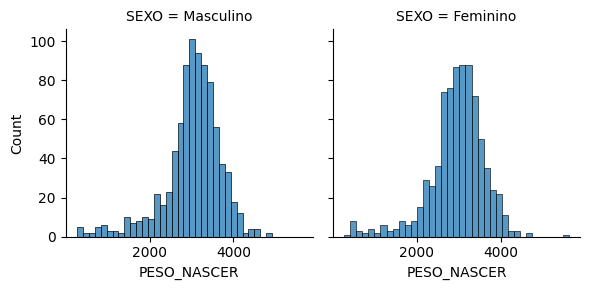

In [18]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print()

# Estatística descritiva - Análise Gráfica
grafico = sns.FacetGrid(dados, col=varCategorica)
grafico.map(sns.histplot, varNumerica)

In [21]:
# 2ª ETAPA - Teste de Levene para saber se as variâncias são IGUAIS ou DIFERENTES entre os grupos

# Teste de Levene - teste de homogeneidade, se as variâncias são iguais
# H0 = as variâncias são iguais
resultado = stats.levene(grupo1, grupo2, center = 'mean')
print('Teste de Levene (variâncias)')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As variâncias são diferentes!')
    varianciasIguais = False
else:
    print('Aceita H0 => As variâncias são iguais!')
    varianciasIguais = True

Teste de Levene (variâncias)
p-value: 0.619
Aceita H0 => As variâncias são iguais!


In [22]:
# 3ª ETAPA - Teste de médias (para variâncias IGUAIS ou DIFERENTES, dependendo do teste de LEVENE)

# Teste t - teste de médias
# H0 = As médias são iguais
resultado = stats.ttest_ind(grupo1, grupo2, equal_var=varianciasIguais)
print('Teste-t de médias')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

Teste-t de médias
p-value: 0.061
Aceita H0 => As médias são iguais!


**IMPORTANTE: O mesmo código porém já com o teste pronto**

In [23]:
# Selecionar os nomes das variáveis  (PESO_NASCER, SEXO)
varNumerica = 'PESO_NASCER'
varCategorica = 'SEXO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.SEXO == 'Feminino')].PESO_NASCER
grupo2 = dados2[(dados2.SEXO == 'Masculino')].PESO_NASCER

Média do Grupo 1: 2953.947
Média do Grupo 2: 3016.460

Teste de Levene (variâncias)
p-value: 0.619
Aceita H0 => As variâncias são iguais!

Teste-t de médias
p-value: 0.061
Aceita H0 => As médias são iguais!



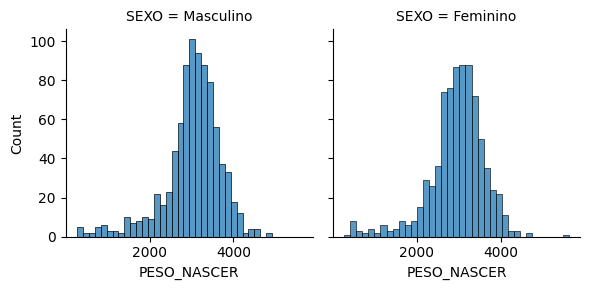

In [24]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print()

# _______________________________________________________________________________________
# 2ª ETAPA - Teste de Levene para saber se as variâncias são IGUAIS ou DIFERENTES entre os grupos

# Teste de Levene - teste de homogeneidade
# H0 = as variâncias são iguais
resultado = stats.levene(grupo1, grupo2, center = 'mean')
print('Teste de Levene (variâncias)')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As variâncias são diferentes!')
    varianciasIguais = False
else:
    print('Aceita H0 => As variâncias são iguais!')
    varianciasIguais = True

print()
# _________________________________________________________________________________
# 3ª ETAPA - Teste de médias (para variâncias IGUAIS ou DIFERENTES, dependendo do teste de LEVENE)

# Teste t - teste de médias
# H0 = As médias são iguais
resultado = stats.ttest_ind(grupo1, grupo2, equal_var=varianciasIguais)

print('Teste-t de médias')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

print()
# Estatística descritiva - Análise Gráfica
grafico = sns.FacetGrid(dados, col=varCategorica)
grafico.map(sns.histplot, varNumerica)

**Exemplo 2: para variâncias diferentes (PESO_NASCER, ALTO_RISCO)**

A média entre o peso ao nascer é igual entre baixo risco e alto risco?

Importante, neste exemplo teremos variâncias diferentes

In [25]:
# Selecionar os nomes das variáveis  (PESO_NASCER, ALTO_RISCO)
varNumerica = 'PESO_NASCER'
varCategorica = 'ALTO_RISCO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.ALTO_RISCO == 'Sim')].PESO_NASCER
grupo2 = dados2[(dados2.ALTO_RISCO == 'Não')].PESO_NASCER

Média do Grupo 1: 2803.354
Média do Grupo 2: 3132.945

Teste de Levene (variâncias)
p-value: 0.000
Rejeita H0 => As variâncias são diferentes!

Teste-t de médias
p-value: 0.000
Rejeita H0 => As médias são diferentes!



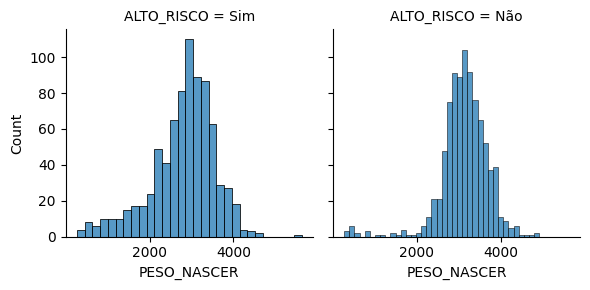

In [26]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print()

# _______________________________________________________________________________________
# 2ª ETAPA - Teste de Levene para saber se as variâncias são IGUAIS ou DIFERENTES entre os grupos

# Teste de Levene - teste de homogeneidade
# H0 = as variâncias são iguais
resultado = stats.levene(grupo1, grupo2, center = 'mean')
print('Teste de Levene (variâncias)')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As variâncias são diferentes!')
    varianciasIguais = False
else:
    print('Aceita H0 => As variâncias são iguais!')
    varianciasIguais = True

print()
# _________________________________________________________________________________
# 3ª ETAPA - Teste de médias (para variâncias IGUAIS ou DIFERENTES, dependendo do teste de LEVENE)

# Teste t - teste de médias
# H0 = As médias são iguais
resultado = stats.ttest_ind(grupo1, grupo2, equal_var=varianciasIguais)

print('Teste-t de médias')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

print()
# Estatística descritiva - Análise Gráfica
grafico = sns.FacetGrid(dados, col=varCategorica)
grafico.map(sns.histplot, varNumerica)

Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

# Teste t Pareado - Teste de média Pareado (antes e após)

**Exemplo 1: a média do peso do ultrassom é igual a média do peso ao nascer?**

variáveis pareadas/relacionadas para o mesmo indivíduo (antes e após)

In [27]:
# Selecionar os nomes das variáveis  (PESO_US, PESO_NASCER)
varNumerica1 = 'PESO_US'
varNumerica2 = 'PESO_NASCER'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica1, varNumerica2])

# Selecionar os dois grupos
grupo1 = dados2.PESO_US
grupo2 = dados2.PESO_NASCER

Média do Grupo 1: 2061.177
Média do Grupo 2: 3068.423

Teste-t de média pareado
p-value: 0.000
Rejeita H0 => As médias são diferentes!



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

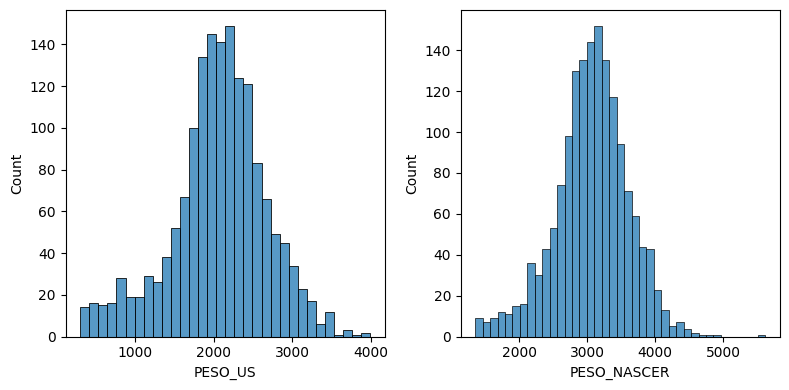

In [28]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de médias pareadas (antes e após) - 2 variáveis

# Teste t - teste de médias para variáveis pareadas
# H0 = As médias são iguais
resultado = stats.ttest_rel(grupo1, grupo2)
print('Teste-t de média pareado')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

# Se, statistic=array([-inf]) ==> INF siginifica que o valor da estatística do teste tende ao infinito (muito baixo)

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(grupo1, ax=ax1)
sns.histplot(grupo2, ax=ax2)
plt.tight_layout()

# para salvar/preparar a figura (depois baixar)
nome_arquivo = 'FiguraAtividade_5.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

**Exemplo 2: a média do peso do ultrassom é igual a média do peso no momento da alta?**

variáveis pareadas/relacionadas para o mesmo indivíduo (antes e após)

In [29]:
# Selecionar os nomes das variáveis  (PESO_US, PESO_ALTA)
varNumerica1 = 'PESO_US'
varNumerica2 = 'PESO_ALTA'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica1, varNumerica2])

# Selecionar os dois grupos
grupo1 = dados2.PESO_US
grupo2 = dados2.PESO_ALTA

Média do Grupo 1: 2061.177
Média do Grupo 2: 2918.423

Teste-t de média pareado
p-value: 0.000
Rejeita H0 => As médias são diferentes!



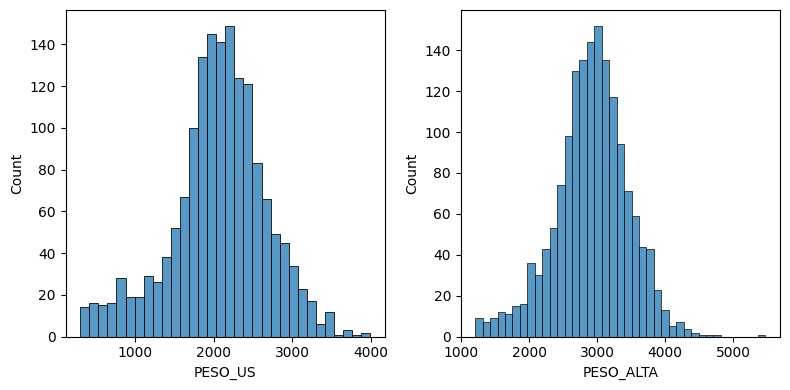

In [30]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de médias pareadas (antes e após) - 2 variáveis

# Teste t - teste de médias para variáveis pareadas
# H0 = As médias são iguais
resultado = stats.ttest_rel(grupo1, grupo2)
print('Teste-t de média pareado')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

# Se, statistic=array([-inf]) ==> INF siginifica que o valor da estatística do teste tende ao infinito

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(grupo1, ax=ax1)
sns.histplot(grupo2, ax=ax2)
plt.tight_layout()

Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

# Teste F - ANOVA - Análise de variâncias - Variáveis independentes

**Três ou mais médias - Exemplo: Prematuro, Termo-precoce, Termo**

Os pressupostos básicos da análise de variância são:
*   As amostras são aleatórias e independentes.
*   As populações têm distribuição normal (o teste é paramétrico).
*   As variâncias populacionais são iguais.

**Exemplo 1: a média dos valores do equipamento A é igual entre os RNs prematuros, termo-precoce e termo?**

Importante: em pelo menos uma das três distribuições deve ter distribuição normal.

In [31]:
# Selecionar os nomes das variáveis  (EQUIPAMENTO_A, IG_TERMO)
varNumerica = 'EQUIPAMENTO_A'
varCategorica = 'IG_TERMO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.IG_TERMO == 'Prematuro')].EQUIPAMENTO_A
grupo2 = dados2[(dados2.IG_TERMO == 'Termo-precoce')].EQUIPAMENTO_A
grupo3 = dados2[(dados2.IG_TERMO == 'Termo')].EQUIPAMENTO_A

ordem = ['Prematuro', 'Termo-precoce', 'Termo']

Média do Grupo 1: 3090.787
Média do Grupo 2: 3105.110
Média do Grupo 3: 3067.972

Teste-F ANOVA
p-value: 0.749
Aceita H0 => As médias são iguais!



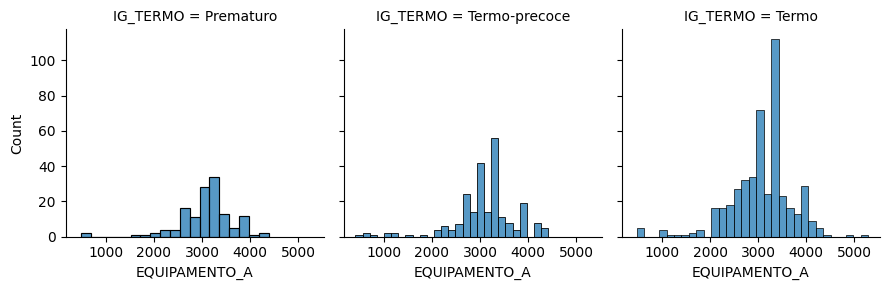

In [32]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()
mediaG3 = grupo3.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print(f'Média do Grupo 3: {mediaG3:.3f}')
print()

# ___________________________________________________________________
# 2º ETAPA - Realizar o teste ANOVA - 3+ variáveis

# Teste F - ANOVA
# H0 = As médias são iguais
resultado = stats.f_oneway(grupo1, grupo2, grupo3)
print('Teste-F ANOVA')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

print()
# Estatística descritiva - Análise Gráfica
grafico = sns.FacetGrid(dados, col=varCategorica, col_order=ordem)
grafico.map(sns.histplot, varNumerica)

**Interpretação:** No exemplo acima, as médias populacionais entre os 3 grupos é estatisticamente igual. Ou seja, não precisa investigar se há diferença entre elas.

**Exemplo 2: A média dos valores do peso no ultrassom é igual entre os RNs prematuros, termo-precoce e termo?**

Importante: em pelo menos uma das três distribuições deve ter distribuição normal.

In [33]:
# Selecionar os nomes das variáveis  (PESO_US, IG_TERMO)
varNumerica = 'PESO_US'
varCategorica = 'IG_TERMO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.IG_TERMO == 'Prematuro')].PESO_US
grupo2 = dados2[(dados2.IG_TERMO == 'Termo-precoce')].PESO_US
grupo3 = dados2[(dados2.IG_TERMO == 'Termo')].PESO_US

ordem = ['Prematuro', 'Termo-precoce', 'Termo']

Média do Grupo 1: 1156.722
Média do Grupo 2: 1985.774
Média do Grupo 3: 2314.869

Teste-F ANOVA
p-value: 0.000
Rejeita H0 => As médias são diferentes!



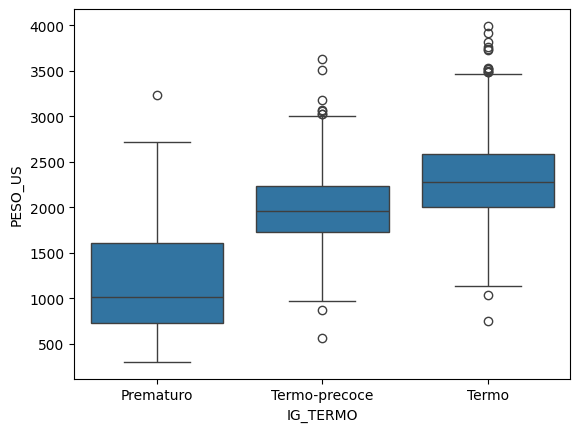

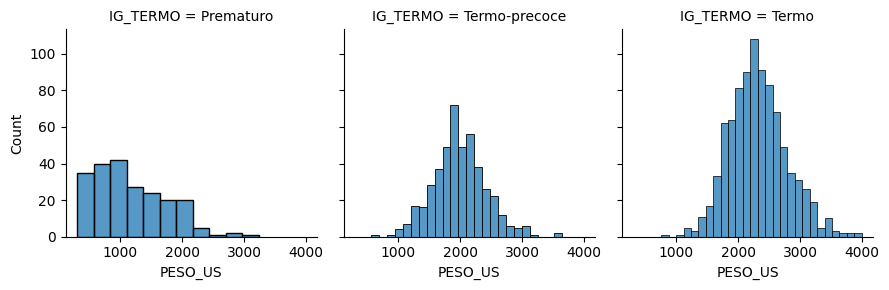

In [34]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()
mediaG3 = grupo3.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print(f'Média do Grupo 3: {mediaG3:.3f}')
print()

# ___________________________________________________________________
# 2º ETAPA - Realizar o teste ANOVA - 3+ variáveis

# Teste F - ANOVA
# H0 = As médias são iguais
resultado = stats.f_oneway(grupo1, grupo2, grupo3)
print('Teste-F ANOVA')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')

print()
# Estatística descritiva - Análise Gráfica
# Boxplot agrupado
ordem = ['Prematuro', 'Termo-precoce', 'Termo']
sns.boxplot(data=dados2, y=varNumerica, x=varCategorica, linewidth=1, order=ordem)

# Estatística descritiva - Análise Gráfica
grafico = sns.FacetGrid(dados, col=varCategorica, col_order=ordem)
grafico.map(sns.histplot, varNumerica)

**IMPORTANTE:** No exemplo acima as médias são diferentes, então precisamos investigar onde está diferença - Teste de Tukey-HSD

In [35]:
# ___________________________________________________________________
# 3º ETAPA - Se houver diferença, aplicar teste TUKEY para saber em qual combinação está a diferença

# Teste de Tukey-HSD
# H0: as médias são iguais (entre os sub-grupos analisados)

resultado = stsmodels.pairwise_tukeyhsd(endog=dados2[varNumerica], groups=dados2[varCategorica], alpha=0.05)

# resultados
print(resultado)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2     meandiff p-adj   lower     upper   reject
------------------------------------------------------------------
Prematuro         Termo 1158.1471   0.0  1074.217 1242.0772   True
Prematuro Termo-precoce  829.0515   0.0  737.4748  920.6282   True
    Termo Termo-precoce -329.0956   0.0 -392.9244 -265.2667   True
------------------------------------------------------------------


Na tabela de resultado do Tukey o p-value é mostrado na coluna "p-adj" e ao final a tabela em REJECT indica se rejeita ou aceita a hipótese nula (de que as médias são iguais).

Saiba mais - Tukey: https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html

**Exemplo 2: A média dos valores do peso ao nascer é igual entre os RNs prematuros, termo-precoce e termo?**

Importante: em pelo menos uma das três distribuições deve ter distribuição normal.

In [36]:
# Selecionar os nomes das variáveis (PESO_NASCER, IG_TERMO)
varNumerica = 'PESO_NASCER'
varCategorica = 'IG_TERMO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.IG_TERMO == 'Prematuro')].PESO_NASCER
grupo2 = dados2[(dados2.IG_TERMO == 'Termo-precoce')].PESO_NASCER
grupo3 = dados2[(dados2.IG_TERMO == 'Termo')].PESO_NASCER

ordem = ['Prematuro', 'Termo-precoce', 'Termo']

Média do Grupo 1: 2056.197
Média do Grupo 2: 2985.091
Média do Grupo 3: 3267.128

Teste-F ANOVA
p-value: 0.000
Rejeita H0 => As médias são diferentes!

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2     meandiff p-adj   lower     upper   reject
------------------------------------------------------------------
Prematuro         Termo 1210.9308   0.0 1126.5306  1295.331   True
Prematuro Termo-precoce  928.8935   0.0  835.2361 1022.5508   True
    Termo Termo-precoce -282.0373   0.0  -353.408 -210.6667   True
------------------------------------------------------------------



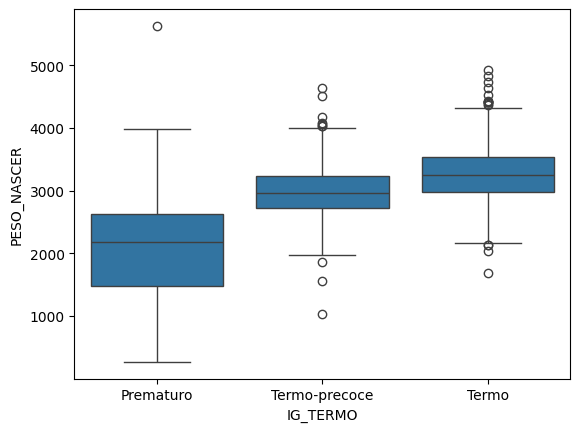

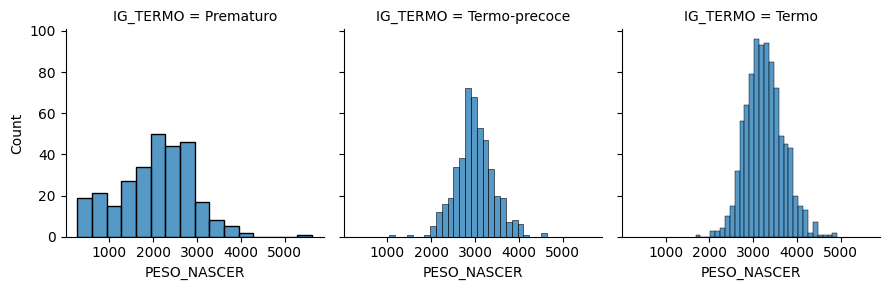

In [37]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores médios
mediaG1 = grupo1.mean()
mediaG2 = grupo2.mean()
mediaG3 = grupo3.mean()

print(f'Média do Grupo 1: {mediaG1:.3f}')
print(f'Média do Grupo 2: {mediaG2:.3f}')
print(f'Média do Grupo 3: {mediaG3:.3f}')
print()

# ___________________________________________________________________
# 2º ETAPA - Realizar o teste ANOVA - 3+ variáveis

# Teste F - ANOVA
# H0 = As médias são iguais
resultado = stats.f_oneway(grupo1, grupo2, grupo3)
print('Teste-F ANOVA')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As médias são diferentes!')
else:
    print('Aceita H0 => As médias são iguais!')
print()

# ___________________________________________________________________
# 3º ETAPA - Se houver diferença, aplicar teste TUKEY para saber em qual combinação está a diferença

# Teste de Tukey-HSD
# H0: as médias são iguais (entre os sub-grupos analisados)

resultado = stsmodels.pairwise_tukeyhsd(endog=dados2[varNumerica], groups=dados2[varCategorica], alpha=0.05)
print(resultado)

# _____________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica
# Boxplot agrupado
sns.boxplot(data=dados2, y=varNumerica, x=varCategorica, linewidth=1, order=ordem)

# Estatística descritiva - Análise Gráfica
grafico = sns.FacetGrid(dados, col=varCategorica, col_order=ordem)
grafico.map(sns.histplot, varNumerica)

Na tabela de resultado do Tukey o p-value é mostrado na coluna "p-adj" e ao final a tabela em REJECT indica se rejeita ou aceita a hipótese nula (de que as médias são iguais).

Saiba mais - ANOVA: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway

# Teste F - ANOVA de medidas repetidas/pareadas
Variáveis dependentes (pareadas)
## Três ou mais medidas sequenciais

**Exemplo 1: Existe diferença entre as respostas médias entre 4 fármacos diferentes ministrados aos pacientes?**

In [38]:
# Simular dados para fazer o exercício
# 5 pacientes, receberam 4 fármacos diferentes, e tiveram respostas diferentes
BD_Pacientes = pd.DataFrame({'paciente': np.repeat ([1, 2, 3, 4, 5], 4),
                             'farmaco': np.tile ([1, 2, 3, 4], 5),
                             'resposta': [30, 28, 16, 34, 14, 18, 10, 22, 24, 20, 18, 30, 38, 34, 20, 44, 26, 28, 14, 30]})
BD_Pacientes

,paciente,farmaco,resposta
0,1,1,30
1,1,2,28
2,1,3,16
3,1,4,34
4,2,1,14
5,2,2,18
6,2,3,10
7,2,4,22
8,3,1,24
9,3,2,20


In [39]:
# Fazer o cáculo da Anova para medidas repetidas
anova = AnovaRM(data = BD_Pacientes, depvar = 'resposta', subject = 'paciente', within = ['farmaco']).fit()
print(anova)

# Neste resultado, temos um p-value=0.0000 (<0,001) -> Rejeita H0, ou seja, existe diferença significativa entre os fármacos

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
farmaco 24.7589 3.0000 12.0000 0.0000



In [40]:
# Se houver diferença, aplicar teste TUKEY para saber em qual combinação está a diferença

# Teste de Tukey-HSD
# H0: as médias são iguais (entre os sub-grupos analisados)

resultado = stsmodels.pairwise_tukeyhsd(endog=BD_Pacientes['resposta'], groups=BD_Pacientes['farmaco'], alpha=0.05)

# resultados
print(resultado)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     -0.8 0.9979 -13.5436 11.9436  False
     1      3    -10.8 0.1122 -23.5436  1.9436  False
     1      4      5.6 0.6015  -7.1436 18.3436  False
     2      3    -10.0 0.1533 -22.7436  2.7436  False
     2      4      6.4 0.4959  -6.3436 19.1436  False
     3      4     16.4 0.0098   3.6564 29.1436   True
-----------------------------------------------------


Na tabela de resultado do Tukey o p-value é mostrado na coluna "p-adj" e ao final a tabela em REJECT indica se rejeita ou aceita a hipótese nula (de que as médias são iguais).

Saiba mais: https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.AnovaRM.html

**Exemplo 2: Existe diferença entre as médias dos pesos medidos nos 3 momentos (PESO_US, PESO_NASCER, PESO_ALTA)?**

Neste exemplo, foi preparado uma planilha com os pesos em sequência e os pacientes repetidos na base de dados, para que a planilha fique com a estrutura exigida na fórmula.

In [41]:
# Endereço do arquivo com a base de dados
arquivo2 = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS_anova.xlsx'

# Ler o arquivo
dados_anova = pd.read_excel(arquivo2)
dados_anova

,PACIENTE,TIPOPESO,PESO
0,1,PESO_NASCER,1355.0
1,2,PESO_NASCER,1430.0
2,3,PESO_NASCER,1435.0
3,4,PESO_NASCER,1440.0
4,5,PESO_NASCER,1440.0
...,...,...,...
4780,1591,PESO_ALTA,4485.0
4781,1592,PESO_ALTA,4585.0
4782,1593,PESO_ALTA,4670.0
4783,1594,PESO_ALTA,4770.0


In [42]:
# Esse código é só para conferir como os pacientes se repetem
# nessa base de dados planejada para aplicar o ANOVA de medidas repetidas

# Vamos ver só os pacientes com codigo = 1
dadosFiltrados = dados_anova[ (dados_anova.PACIENTE == 1) ]
dadosFiltrados

,PACIENTE,TIPOPESO,PESO
0,1,PESO_NASCER,1355.0
1595,1,PESO_US,355.0
3190,1,PESO_ALTA,1205.0


In [43]:
# Fazer o cáculo da Anova para medidas repetidas
anova = AnovaRM(data = dados_anova , depvar = 'PESO', subject = 'PACIENTE', within = ['TIPOPESO']).fit()
print(anova)

# Neste resultado, tempo um p-value=0.0000 (<0,001) -> Rejeita H0
# Ou seja, existe diferença significativa entre os pesos (medidos em 3 momentos diferentes)

                   Anova
          F Value   Num DF   Den DF  Pr > F
-------------------------------------------
TIPOPESO 62349.4394 2.0000 3188.0000 0.0000



In [44]:
# Se houver diferença, aplicar teste TUKEY para saber em qual combinação está a diferença

# Teste de Tukey-HSD
# H0: as médias são iguais (entre os sub-grupos analisados)

resultado = stsmodels.pairwise_tukeyhsd(endog=dados_anova['PESO'], groups=dados_anova['TIPOPESO'], alpha=0.05)

# resultados
print(resultado)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj   lower      upper   reject
-------------------------------------------------------------------
  PESO_ALTA PESO_NASCER     150.0   0.0   102.9388  197.0612   True
  PESO_ALTA     PESO_US  -857.246   0.0  -904.3072 -810.1847   True
PESO_NASCER     PESO_US -1007.246   0.0 -1054.3072 -960.1847   True
-------------------------------------------------------------------
